# Assignment
**First:** Develop a predictive model that predicts lawn mower ownership (use the RisingMower.csv data) using SVM classification and the three kernels demonstrated in class today. (we have yet to cover things like cross-validation and grid search - use the class material covered so far to address this problem). Display the results of each of these models (accuracy, precision, recall, and F1) and save the 'winning' model to a pickle file. (NOTE: Since this is a 'real' model you plan to deploy, be sure to include an appropriate train/test split into your modeling process)

**Second:** Create an application that asks the user for an income and lot size and answers if it's predicted that this property would own a lawnmower (also include the probability of this prediction). You can choose a text-based application or Web (see the examples I reviewed in Class 03).


In [20]:
import pandas as pd
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(1)

## 1.0 Data exploration

In [21]:
lawnmower = pd.read_csv('./data/RidingMowers.csv')
lawnmower.tail()

,Income,Lot_Size,Ownership
19,66.0,18.4,Nonowner
20,47.4,16.4,Nonowner
21,33.0,18.8,Nonowner
22,51.0,14.0,Nonowner
23,63.0,14.8,Nonowner


In [22]:
lawnmower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     24 non-null     float64
 1   Lot_Size   24 non-null     float64
 2   Ownership  24 non-null     object 
dtypes: float64(2), object(1)
memory usage: 704.0+ bytes


In [23]:
lawnmower.describe()

,Income,Lot_Size
count,24.000000,24.000000
mean,68.437500,18.950000
std,19.793144,2.428275
min,33.000000,14.000000
25%,52.350000,17.500000
50%,64.800000,19.000000
75%,83.100000,20.800000
max,110.100000,23.600000


In [24]:
#encode target
df = lawnmower
df.loc[df["Ownership"] == "Owner", "Ownership"] = 1
df.loc[df["Ownership"] == "Nonowner", "Ownership"] = 0
df["Ownership"] = df["Ownership"].apply(pd.to_numeric)

In [25]:
df

,Income,Lot_Size,Ownership
0,60.0,18.4,1
1,85.5,16.8,1
2,64.8,21.6,1
3,61.5,20.8,1
4,87.0,23.6,1
5,110.1,19.2,1
6,108.0,17.6,1
7,82.8,22.4,1
8,69.0,20.0,1
9,93.0,20.8,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     24 non-null     float64
 1   Lot_Size   24 non-null     float64
 2   Ownership  24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 704.0 bytes


Text(0, 0.5, 'Lot Size (000s sqft)')

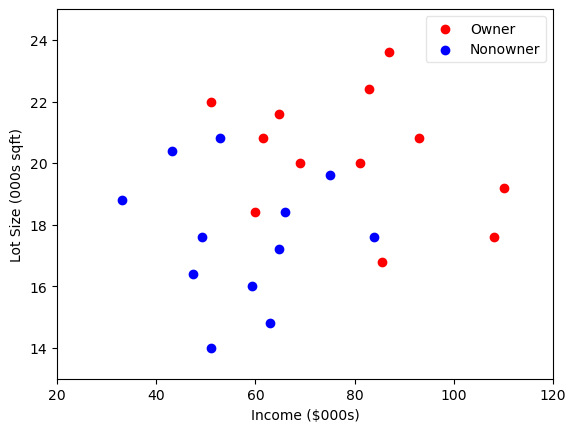

In [27]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df.loc[df.Ownership==1]['Income'], 
           df.loc[df.Ownership==1]['Lot_Size'], 
           marker='o', 
           color='red')
ax.scatter(df.loc[df.Ownership==0]['Income'], 
           df.loc[df.Ownership==0]['Lot_Size'], 
           marker='o', 
           color='blue')

ax.legend(["Owner", "Nonowner"], framealpha=0.5)
                                         
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')

## 2.0 Split train and test sets

In [28]:
# split the data into validation and training set
train_df, test_df = train_test_split(df, test_size=0.3) 

# Create variables to represent the columns
# that are our predictors and target
target = 'Ownership'
predictors = list(df.columns)
predictors.remove(target)
predictors

['Income', 'Lot_Size']

In [29]:
# obtain the X and y of each dataset (training and test)
train_X = train_df[predictors]
train_y = train_df[target]
test_X = test_df[predictors]
test_y = test_df[target]

## 3.0 SVM classification

In [30]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

In [31]:
def performance_metrics(test_y, model_preds, performance, model_name):
    c_matrix = confusion_matrix(test_y, model_preds)
    TP = c_matrix[1][1]
    TN = c_matrix[0][0]
    FP = c_matrix[0][1]
    FN = c_matrix[1][0]
    performance = pd.concat([performance, pd.DataFrame({'model': str(model_name), 
                                                        'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                        'Precision': [TP/(TP+FP)], 
                                                        'Recall': [TP/(TP+FN)], 
                                                        'F1': [2*TP/(2*TP+FP+FN)]
                                                        }, index=[0])])
    return performance

### 3.1 SVM with linear kernel

In [32]:
#Training
svm_lin_model = SVC(kernel="linear", probability=True)
_ = svm_lin_model.fit(train_X, np.ravel(train_y))

#Test
model_preds_svm_lin = svm_lin_model.predict(test_X)
performance = performance_metrics(test_y, model_preds_svm_lin, performance, "linear svm")

### 3.2 SVM with rbf kernel

In [33]:
#Training
svm_rbf_model = SVC(kernel="rbf", C=10, gamma='scale', probability=True)
_ = svm_rbf_model.fit(train_X, np.ravel(train_y))

#Test
model_preds_svm_rbf = svm_rbf_model.predict(test_X)
performance = performance_metrics(test_y, model_preds_svm_rbf, performance, "rbf svm")

### 3.3 SVM with polynomial kernel

In [34]:
#Training
svm_poly_model = SVC(kernel="poly", degree=3, coef0=1, C=10, probability=True)
_ = svm_poly_model.fit(train_X, np.ravel(train_y))

#Test
model_preds_svm_poly = svm_poly_model.predict(test_X)
performance = performance_metrics(test_y, model_preds_svm_poly, performance, "poly svm")

## 4.0 Summary

In [35]:
fit = pd.DataFrame(train_y) 
fit['Fit linear'] = svm_lin_model.predict(train_X)
fit['Fit rbf'] = svm_rbf_model.predict(train_X)
fit['Fit poly'] = svm_poly_model.predict(train_X)

final_predictions = pd.DataFrame(test_y) 
final_predictions['Prediction linear'] = model_preds_svm_lin
final_predictions['Prediction rbf'] = model_preds_svm_rbf
final_predictions['Prediction poly'] = model_preds_svm_poly

print("SCORES: \n")
print(performance)

SCORES: 

        model  Accuracy  Precision    Recall        F1
0  linear svm     1.000   1.000000  1.000000  1.000000
0     rbf svm     0.750   0.666667  0.666667  0.666667
0    poly svm     0.875   1.000000  0.666667  0.800000


In [36]:
print("Predictions: \n")
print(final_predictions)

Predictions: 

    Ownership  Prediction linear  Prediction rbf  Prediction poly
13          0                  0               0                0
18          0                  0               0                0
3           1                  1               1                1
14          0                  0               1                0
20          0                  0               0                0
17          0                  0               0                0
10          1                  1               0                0
4           1                  1               1                1


In [37]:
print("Fit: \n")
print(fit)

Fit: 

    Ownership  Fit linear  Fit rbf  Fit poly
2           1           1        1         1
19          0           1        1         1
6           1           1        1         1
7           1           1        1         1
21          0           0        0         0
1           1           1        1         1
16          0           1        1         1
0           1           0        0         0
15          0           0        0         0
23          0           0        0         0
22          0           0        0         0
9           1           1        1         1
8           1           1        1         1
12          0           1        1         1
11          1           1        1         1
5           1           1        1         1


## 5.0 Save the data

**The winning model is: SVM with linear kernel**

In [40]:
import pickle
import os

path = './data'
if not os.path.exists(path):
   os.makedirs(path)

pickle.dump(svm_lin_model, open(path + '/LinearSVM_lawnmower.pkl', "wb"))